In [14]:
import sys
sys.path.append('../../Build/x64/Release/pycaffe')
import caffe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = caffe.Net('tophand.prototxt', 'tophand.caffemodel', caffe.TEST)

In [8]:
param = net.params['conv4_4_CPM'][0]

In [9]:
print param

In [21]:
 
 
def visualize_weights(net, layer_name, padding=4, filename=''):
    # The parameters are a list of [weights, biases]
    data = np.copy(net.params[layer_name][0].data)
    # N is the total number of convolutions
    N = data.shape[0]*data.shape[1]
    # Ensure the resulting image is square
    filters_per_row = int(np.ceil(np.sqrt(N)))
    # Assume the filters are square
    filter_size = data.shape[2]
    # Size of the result image including padding
    result_size = filters_per_row*(filter_size + padding) - padding
    # Initialize result image to all zeros
    result = np.zeros((result_size, result_size))
 
    # Tile the filters into the result image
    filter_x = 0
    filter_y = 0
    for n in range(data.shape[0]):
        for c in range(data.shape[1]):
            if filter_x == filters_per_row:
                filter_y += 1
                filter_x = 0
            for i in range(filter_size):
                for j in range(filter_size):
                    result[filter_y*(filter_size + padding) + i, filter_x*(filter_size + padding) + j] = data[n, c, i, j]
            filter_x += 1
 
    # Normalize image to 0-1
    min = result.min()
    max = result.max()
    result = (result - min) / (max - min)
 
    # Plot figure
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(result, cmap='gray', interpolation='nearest')
 
 
    # Save plot if filename is set
    if filename != '':
        plt.savefig(filename, bbox_inches='tight', pad_inches=0)
 
    plt.show()

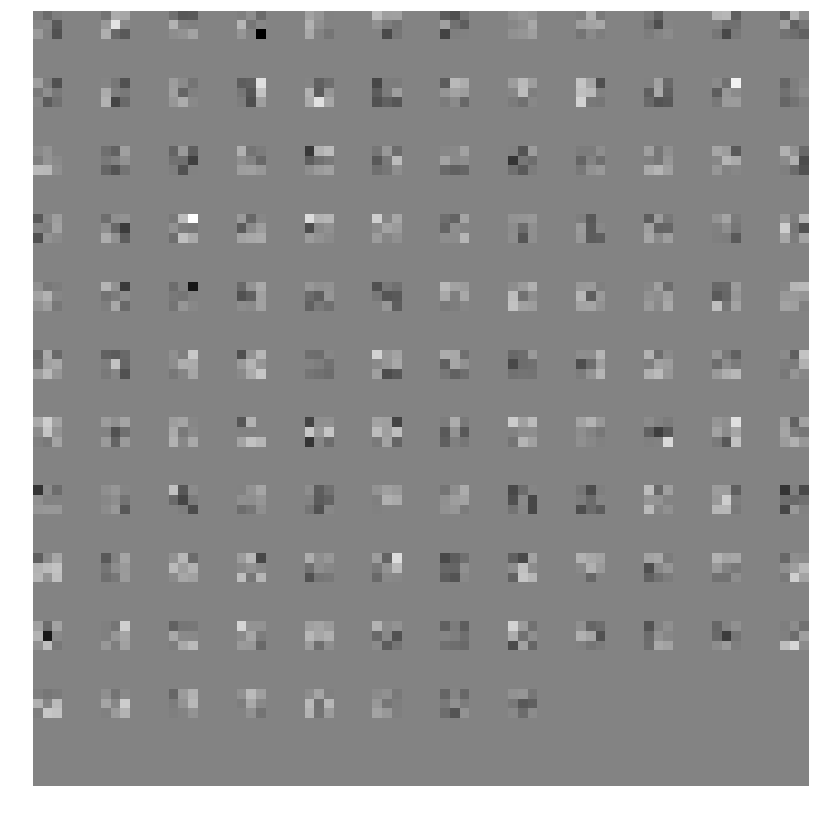

In [26]:
filters = net.params['conv4_4_CPM'][0].data  
visualize_weights(net, 'dpconv_9')